# Exploration of the .skeleton files provided in the NTU-RGB-D dataset

The aim of this notebook is to extract the 3D coordinates of the .skeleton files and play them back. The sample names follow the notation SsssCcccPpppRrrrAaaa with :

S : setup number 

C : camera id

P : performer id

R : replication number

A : action label

In [1]:
%matplotlib notebook
import numpy as np
import os
import random
import sys

from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from play_skeleton import *
from src.utils.joints import *
from src.utils.utils import *

# Global variables (change depending on your setup)
project_dir = os.getcwd() + '/../'
raw_data = project_dir + "data/raw/"
skeleton_folder = raw_data + "skeletons/"


## 1. Choose a random sample

In [2]:
sample_name = os.path.splitext(random.choice(os.listdir(skeleton_folder)))[0]
print("Chosen sample name : " + str(sample_name))

Chosen sample name : S009C001P025R001A002


## 2. Extract skeleton coordinates

read_xyz(...) returns a (3, max_frame, num_joint=25, 2) numpy array

read_color_xy(...) returns (2, max_frame, num_joint=25, 2) numpy array

In [3]:
skeleton = read_xyz(skeleton_folder + sample_name + ".skeleton") # shape (3, 103, 25, 2)

print("===== 3D skeleton =====")
print(skeleton[:, 0, :, 0])
print(skeleton.transpose(3, 2, 0, 1)[0].shape)

print("\r\n===== 2D RGB skeleton =====")
skeleton_2d = read_color_xy(skeleton_folder + sample_name + ".skeleton")
print(skeleton_2d[:, 0, :, 0])

has_2_subjects = np.any(skeleton_2d[:, :, :, 1])
print("Number of subjects : " + str(int(has_2_subjects) * 2))

===== 3D skeleton =====
[[ 0.094  0.11   0.124  0.072 -0.014 -0.036  0.031  0.099  0.253  0.343
   0.131  0.032  0.032  0.093  0.107  0.046  0.154  0.164  0.215  0.143
   0.121  0.081  0.182 -0.054  0.036]
 [ 0.024  0.309  0.586  0.717  0.466  0.287  0.249  0.223  0.463  0.262
   0.215  0.227  0.016 -0.405 -0.779 -0.816  0.031 -0.423 -0.783 -0.844
   0.518  0.221  0.206  0.216  0.215]
 [ 2.429  2.419  2.398  2.397  2.508  2.617  2.324  2.134  2.328  2.298
   2.17   2.138  2.43   2.394  2.419  2.297  2.358  2.349  2.351  2.334
   2.405  2.099  2.162  2.13   2.189]]
(25, 3, 105)

===== 2D RGB skeleton =====
[[1024.606  1032.111  1039.207  1016.392   977.2208  967.6724  999.1288
  1035.847  1099.962  1142.876  1050.529  1002.76    997.597  1024.603
  1029.264  1004.966  1053.129  1057.746  1079.938  1048.371  1037.455
  1028.329  1075.777   960.0149 1003.609 ]
 [ 556.788   432.3621  309.1724  250.8519  370.8148  451.415   453.8515
   456.9985  357.2401  447.1816  462.6921  454.9567  560.2

## 3. Playback skeleton animation (first subject only)

<IPython.core.display.Javascript object>


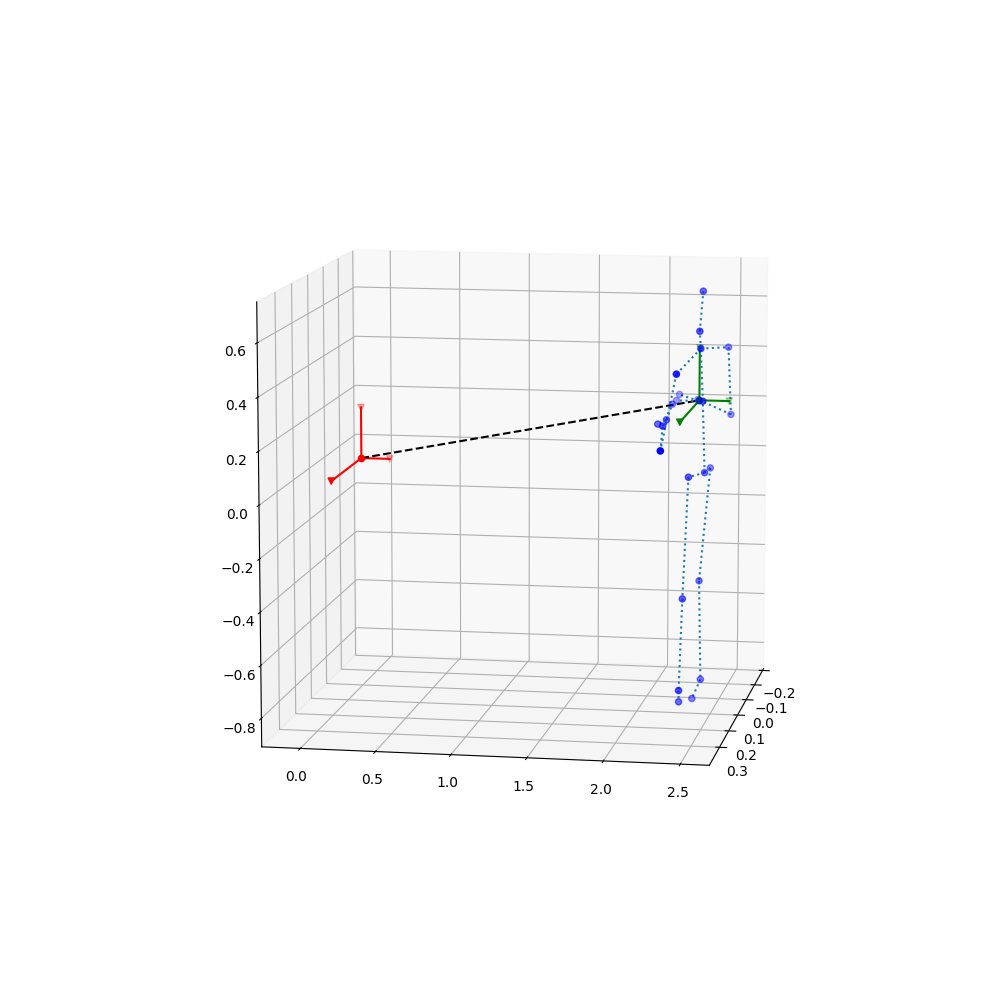

In [4]:
animateJointCoordinates(skeleton.transpose(3, 2, 0, 1)[0], connexion_tuples)